  IMPORT BASIC LIBRARIES

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [115]:
data = pd.read_csv("C:/Users/sidra fathima/Downloads/Churn_Modelling.csv")

In [116]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [118]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [119]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

DATA PREPROCESSING

In [120]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [121]:
#drop irrelevant columns directly
data.drop(columns=['Surname','RowNumber'], inplace=True,axis =1)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'].values)
data['Gender'] = le.fit_transform(data['Gender'].values)

In [123]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
#fit and transform the data
data_standardized = data.copy()
data_standardized[['CreditScore', 'Age', 'Balance','EstimatedSalary']] = standard_scaler.fit_transform(data[['CreditScore', 'Age', 'Balance','EstimatedSalary']])


   Exploratory Data Analysis
 

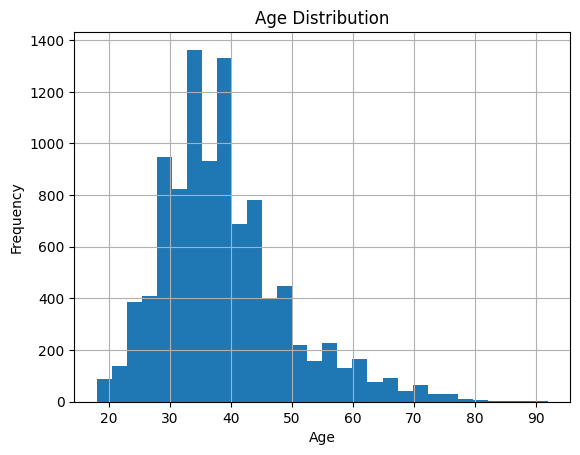

In [124]:
data['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

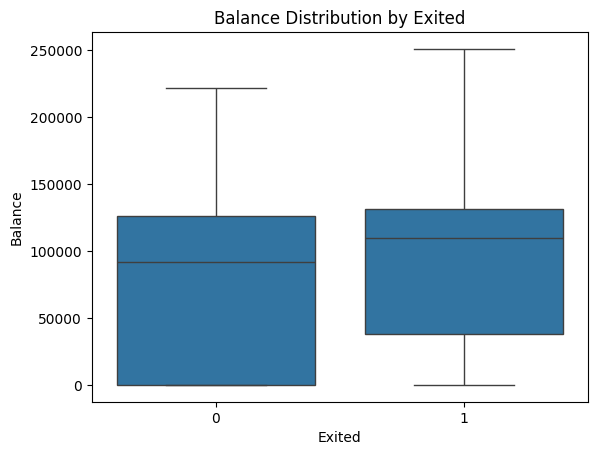

In [125]:
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Balance Distribution by Exited')
plt.show()

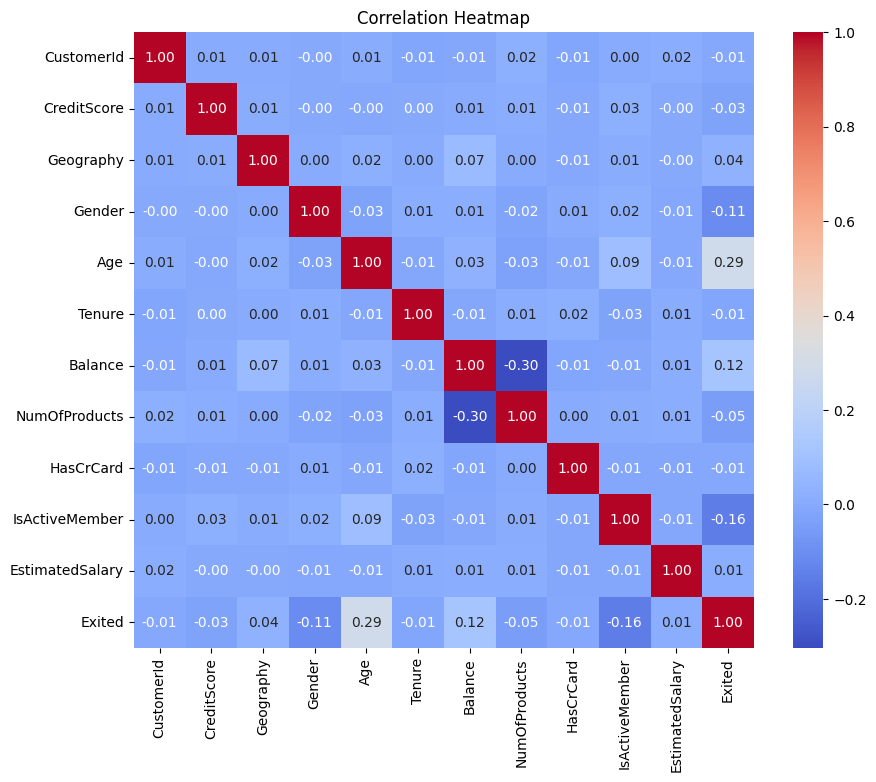

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Divide Data into X and Y

In [127]:
X = data.drop(columns = ['Exited'],axis = 1)
y = data['Exited']


   SPLIT DATA INTO TRAIN AND TEST PARTS
  

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [129]:
#checking count of the dataset
class_frequencies = data['Exited'].value_counts()

#Display the count
print(class_frequencies)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [130]:
#importing library
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with a fixed random state
smote = SMOTE(random_state=42)

# Generate resampled datasets to balance class distribution.
x_resampled,y_resampled = smote.fit_resample(x,y)

In [131]:
print("resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

resampled class distribution:
Exited
1    7963
0    7963
Name: count, dtype: int64



  TRAIN MODEL
   

Logistic Regression

In [132]:
#importing library
from sklearn.linear_model import LogisticRegression
#loading model in variable
LR = LogisticRegression(penalty = 'l2',C= 0.01)

In [133]:
LR.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [134]:
#predicting the testing data
pred_LR = LR.predict(x_test)

In [135]:
#evaluates the performance of the trained LR on the testing data
LR.score(x_test,y_test)

0.8053333333333333

In [136]:
#importing library
from sklearn.metrics import accuracy_score

#calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,LR.predict(x_train))
print(train_accuracy)

0.7924285714285715


In [137]:
#importing library
from sklearn.metrics import classification_report

# Displays Classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



In [138]:
y_pred = LR.predict(x_test)
#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.8053333333333333



    RANDOM FOREST

    

In [139]:
# importing library
from sklearn.ensemble import RandomForestClassifier

# Loading model in variable
RF = RandomForestClassifier(n_estimators = 100,random_state = 42,min_samples_leaf=5, min_samples_split=10, max_leaf_nodes=10)

In [140]:
# Training the model x_train and y_train
RF.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [141]:
#predicting the testing data
pred_rf = RF.predict(x_test)

In [142]:
#calculate Accuracy of Trainig Data
train_accuracy = accuracy_score(y_train,RF.predict(x_train))

#displays the accuracy of training data
print(train_accuracy)

0.8477142857142858


In [143]:
#predicts accuracy of testing data
y_pred = RF.predict(x_test)

#calculates Accuracy of testing data
test_accuracy = accuracy_score(y_test,y_pred)

#displays the accuracy of testing data
print(test_accuracy)

0.8533333333333334


In [144]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2416
           1       0.85      0.30      0.44       584

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000

